# Importing Modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Making Training Dataset with the help of Image Data Generator class

**Appyling some Data Augmentation for better training our model**

In [2]:
training_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,rescale=1/255)

In [3]:
training_data = training_gen.flow_from_directory('Face Mask Dataset\Train',target_size=(150,150),class_mode='categorical')

Found 10000 images belonging to 2 classes.


## Making Testing Dataset with the help of Image Data Generator class

In [4]:
testing_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,rescale=1/255)

In [5]:
testing_data = testing_gen.flow_from_directory('Face Mask Dataset\Test',target_size=(150,150),class_mode='categorical')

Found 993 images belonging to 2 classes.


# Building CNN Layers for Feature Extraction

In [6]:
mask_model = tf.keras.models.Sequential()


mask_model.add(tf.keras.layers.Conv2D(12,(6,6),activation='relu',input_shape=(150,150,3)))

mask_model.add(tf.keras.layers.Conv2D(30,(3,3),activation='relu'))
mask_model.add(tf.keras.layers.MaxPool2D((2,2)))
mask_model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
mask_model.add(tf.keras.layers.MaxPool2D((2,2)))


### Flatting Our Image

In [ ]:
mask_model.add(tf.keras.layers.Flatten())

# Giving to ANN

In [7]:
mask_model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))
mask_model.add(tf.keras.layers.Dropout(0.5))

mask_model.add(tf.keras.layers.Dense(units=64, activation = 'relu'))

mask_model.add(tf.keras.layers.Dense(units=64, activation = 'relu'))
mask_model.add(tf.keras.layers.Dropout(0.5))

mask_model.add(tf.keras.layers.Dense(2, activation = "softmax"))

In [8]:
mask_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
mask_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 145, 145, 12)      1308      
                                                                 
 conv2d_1 (Conv2D)           (None, 143, 143, 30)      3270      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 64)        17344     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73984)             0

# Training Our model

In [10]:
mask_model.fit(training_data,validation_data=testing_data,epochs=12)

Epoch 1/12
313/313 [==============================] - 46s 133ms/step - loss: 0.3700 - accuracy: 0.8487 - val_loss: 0.2548 - val_accuracy: 0.8953
Epoch 2/12
313/313 [==============================] - 41s 131ms/step - loss: 0.2262 - accuracy: 0.9177 - val_loss: 0.1943 - val_accuracy: 0.9315
Epoch 3/12
313/313 [==============================] - 43s 136ms/step - loss: 0.1824 - accuracy: 0.9322 - val_loss: 0.1572 - val_accuracy: 0.9476
Epoch 4/12
313/313 [==============================] - 43s 136ms/step - loss: 0.1468 - accuracy: 0.9485 - val_loss: 0.1528 - val_accuracy: 0.9476
Epoch 5/12
313/313 [==============================] - 39s 125ms/step - loss: 0.1272 - accuracy: 0.9535 - val_loss: 0.1227 - val_accuracy: 0.9597
Epoch 6/12
313/313 [==============================] - 39s 123ms/step - loss: 0.1057 - accuracy: 0.9619 - val_loss: 0.1344 - val_accuracy: 0.9617
Epoch 7/12
313/313 [==============================] - 39s 124ms/step - loss: 0.0939 - accuracy: 0.9674 - val_loss: 0.1078 - val_ac

## Storing the model's history

In [11]:
report = mask_model.history.history

## Ploting the losses of model

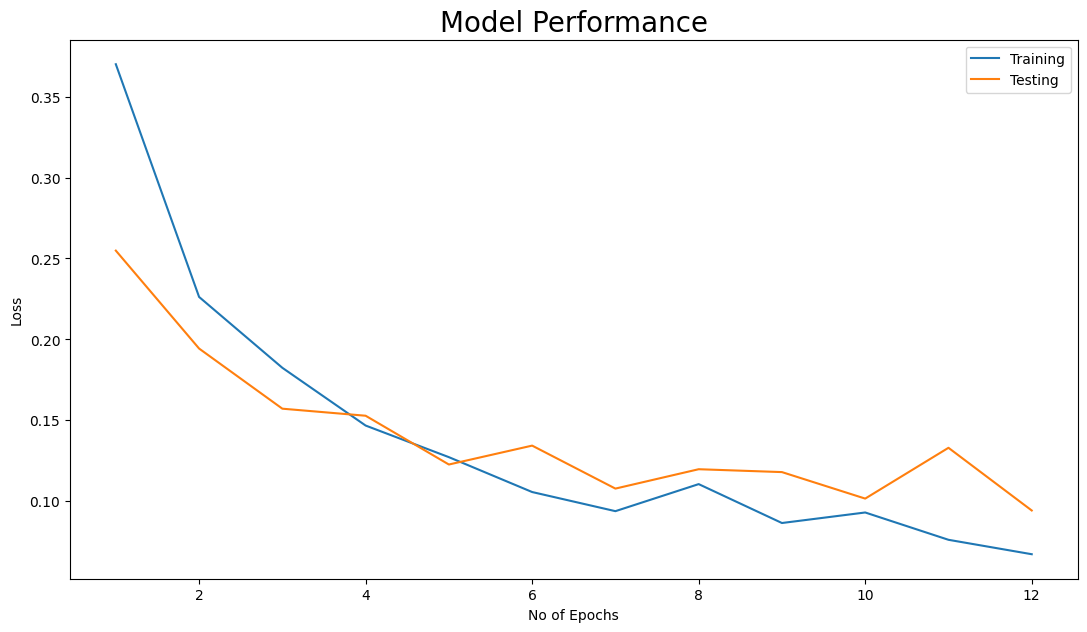

In [12]:
plt.figure(figsize=(13,7))
plt.plot(range(1,13),report['loss'],label='Training')
plt.plot(range(1,13),report['val_loss'],label='Testing')
plt.legend()
plt.title('Model Performance',size=20)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.show()

## Saving Our model

In [13]:
tf.keras.models.save_model(mask_model,'Face Detection Model (new).h5')